# Exploratory Data Analysis

## Getting Started
### Libraries to Import

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read in Data

This is a fairly common dataset, here sourced from [data.world](https://data.world/data-society/capital-bikeshare-2011-2012), but also available from the UCI database.

In [2]:
df = pd.read_csv('Data/bike_data.csv')

## Data Cleaning

In [58]:
df.isnull().sum()

Date                   0
Season                 0
Hour                   0
Holiday                0
Day of the Week        0
Working Day            0
Weather Type           0
Temperature F          0
Temperature Feels F    0
Humidity               0
Wind Speed             0
Casual Users           0
Registered Users       0
Total Users            0
Month                  0
dtype: int64

Our date column was an object, so transform to a datetime with pandas and create a new column for Month.

In [16]:
df.Date = pd.to_datetime(arg=df.Date)
df['Month'] = df['Date'].dt.month

In [25]:
df.Date.dtype

dtype('<M8[ns]')

Weather Type:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [36]:
df.sample(5)

,Date,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users,Month
15047,2012-09-24,3,4,0,1,1,1,53.9,55.4,67,7,0,8,8,9
5949,2011-09-10,3,10,0,6,0,1,76.3,80.6,65,17,85,233,318,9
15315,2012-10-05,3,8,0,5,1,1,65.9,68.0,64,0,36,749,785,10
10866,2012-04-02,1,22,0,1,1,1,52.1,53.6,44,13,17,106,123,4
14309,2012-08-24,2,10,0,5,1,2,81.5,84.2,48,0,78,184,262,8


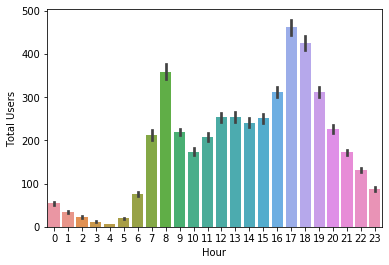

In [42]:
sns.barplot(data=df, x='Hour', y = 'Total Users')

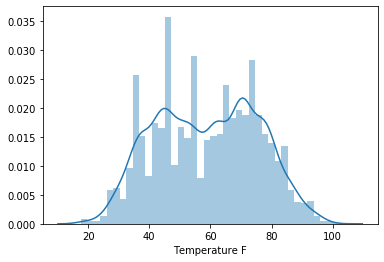

In [47]:
sns.distplot(df['Temperature F'], bins =40)

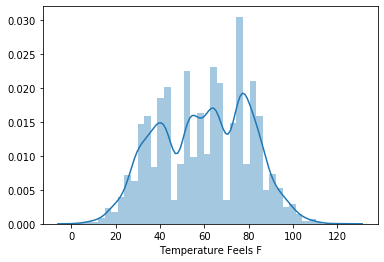

In [48]:
sns.distplot(df['Temperature Feels F'], bins =40)

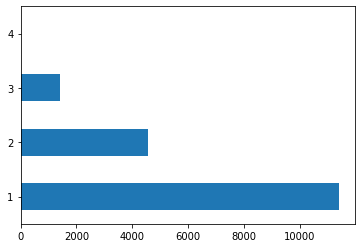

In [11]:
df['Weather Type'].value_counts().plot(kind='barh')

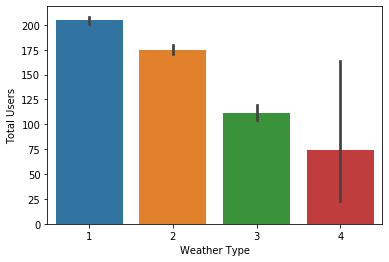

In [40]:
sns.barplot(data=df, x = 'Weather Type', y = 'Total Users')

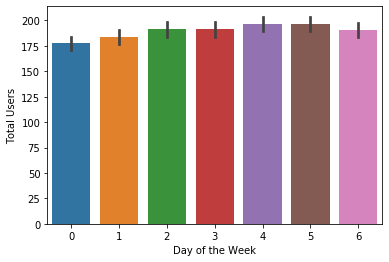

In [41]:
sns.barplot(data=df, x = 'Day of the Week', y = 'Total Users')

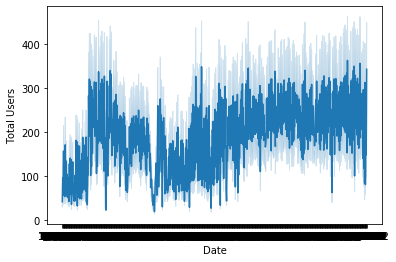

In [13]:
sns.lineplot(x=df.Date, y=df['Total Users'])

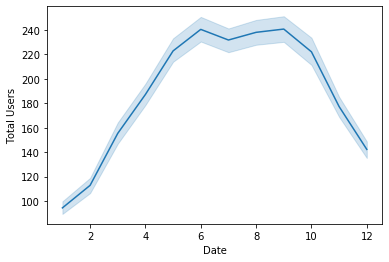

In [27]:
sns.lineplot(x=df.Month, y=df['Total Users'])

In [55]:
corr = df.corr()
corr.style.background_gradient(cmap='bwr').set_precision(2)

,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users,Month
Season,1.00,0.00,0.06,-0.00,-0.04,0.04,-0.47,-0.47,0.01,-0.04,-0.23,-0.10,-0.14,0.21
Hour,0.00,1.00,0.00,-0.00,0.00,-0.02,0.14,0.13,-0.28,0.14,0.30,0.37,0.39,-0.01
Holiday,0.06,0.00,1.00,-0.10,-0.25,-0.02,-0.03,-0.03,-0.01,0.00,0.03,-0.05,-0.03,0.02
Day of the Week,-0.00,-0.00,-0.10,1.00,0.04,0.00,-0.00,-0.01,-0.04,0.01,0.03,0.02,0.03,0.01
Working Day,-0.04,0.00,-0.25,0.04,1.00,0.04,0.06,0.05,0.02,-0.01,-0.30,0.13,0.03,-0.00
Weather Type,0.04,-0.02,-0.02,0.00,0.04,1.00,-0.10,-0.11,0.42,0.03,-0.15,-0.12,-0.14,0.01
Temperature F,-0.47,0.14,-0.03,-0.00,0.06,-0.10,1.00,0.99,-0.07,-0.02,0.46,0.34,0.40,0.20
Temperature Feels F,-0.47,0.13,-0.03,-0.01,0.05,-0.11,0.99,1.00,-0.05,-0.06,0.45,0.33,0.40,0.21
Humidity,0.01,-0.28,-0.01,-0.04,0.02,0.42,-0.07,-0.05,1.00,-0.29,-0.35,-0.27,-0.32,0.16
Wind Speed,-0.04,0.14,0.00,0.01,-0.01,0.03,-0.02,-0.06,-0.29,1.00,0.09,0.08,0.09,-0.14
